# 2021 W35：Estimation of Country-Specific and Global Prevalence of Male Circumcision

## Import packages

In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from pathlib import Path
%matplotlib inline

## Read data

### Target dataset

In [45]:
df = pd.read_excel('../data/Male Circumcision.xlsx', index_col=0)

/Users/ishikawataimu/Projects/makeovermonday/venv/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning:

Unknown extension is not supported and will be removed



In [46]:
df

,Alpha-2 Country Code,Alpha-3 Country Code,Region,Sub-Region,Intermediate Region,Male Circumcision %,CIA Total Males,Total Males Circumcized,Basis
Country/Territory,,,,,,,,,
Afghanistan,AF,AFG,Asia,Southern Asia,NaN,0.9980,16523302,1.649026e+07,Relig
Albania,AL,ALB,Europe,Southern Europe,NaN,0.4770,1499340,7.151852e+05,Survey
Algeria,DZ,DZA,Africa,Northern Africa,NaN,0.9790,20063266,1.964194e+07,Religion
American Samoa,AS,ASM,Oceania,Polynesia,NaN,0.9500,27172,2.581340e+04,Culture
Andorra,AD,AND,Europe,Southern Europe,NaN,0.0110,44036,4.843960e+02,Religion
...,...,...,...,...,...,...,...,...,...
West Bank,PS,WBG,Asia,Western Asia,NaN,0.9990,1419991,1.418571e+06,Religion
Western Sahara,EH,ESH,Africa,Northern Africa,NaN,0.9960,283999,2.828630e+05,Religion
Yemen,YE,YEM,Asia,Western Asia,NaN,0.9901,13566225,1.343192e+07,Religion


### World's geometry for plot maps 

In [47]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## EDA

In [48]:
# Region sub-region
df.groupby(['Region', 'Sub-Region']).count()['Alpha-2 Country Code']

Region    Sub-Region                     
Africa    Northern Africa                     7
          Sub-Saharan Africa                 48
Americas  Latin America and the Caribbean    46
          Northern America                    5
Asia      Central Asia                        5
          Eastern Asia                        8
          Southeast Asia                     11
          Southern Asia                       9
          Western Asia                       19
Europe    Eastern Europe                     10
          Northern Europe                    15
          Southern Europe                    17
          Western Europe                      9
Oceania   Australia and New Zealand           5
          Melanesia                           5
          Micronesia                          7
          Polynesia                          10
Name: Alpha-2 Country Code, dtype: int64

In [49]:
# Basis
df.groupby('Basis').count()['Alpha-2 Country Code']

Basis
Culture      20
No info       8
Relig         1
Religion    135
Survey       72
Name: Alpha-2 Country Code, dtype: int64

In [50]:
# Ratio of all countries 
df['Total Males Circumcized'].sum() / df['CIA Total Males'].sum()

0.38645440342012716

<AxesSubplot:>

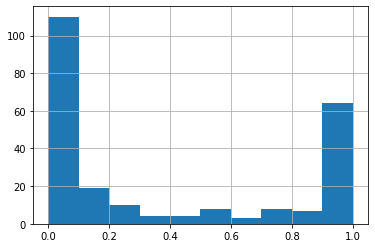

In [51]:
# histgram
df['Male Circumcision %'].hist()

## Preprocessing

In [52]:
# rename Relig to Religion
df.replace('Relig', 'Religion', inplace=True)
df.groupby('Basis').count()['Alpha-2 Country Code']

Basis
Culture      20
No info       8
Religion    136
Survey       72
Name: Alpha-2 Country Code, dtype: int64

<AxesSubplot:>

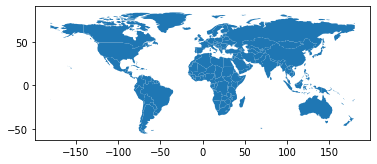

In [53]:
# remove Antarctic from geometries
world = world[world['continent'] != 'Antarctica']
world.plot()

In [54]:
# Join geometry
merged_df = df.reset_index().merge(world[['iso_a3', 'geometry']], left_on='Alpha-3 Country Code', right_on='iso_a3', how='left')
merged_gdf = gpd.GeoDataFrame(merged_df, geometry='geometry').set_index('Alpha-3 Country Code')
merged_gdf

,Country/Territory,Alpha-2 Country Code,Region,Sub-Region,Intermediate Region,Male Circumcision %,CIA Total Males,Total Males Circumcized,Basis,iso_a3,geometry
Alpha-3 Country Code,,,,,,,,,,,
AFG,Afghanistan,AF,Asia,Southern Asia,NaN,0.9980,16523302,1.649026e+07,Religion,AFG,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
ALB,Albania,AL,Europe,Southern Europe,NaN,0.4770,1499340,7.151852e+05,Survey,ALB,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
DZA,Algeria,DZ,Africa,Northern Africa,NaN,0.9790,20063266,1.964194e+07,Religion,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
ASM,American Samoa,AS,Oceania,Polynesia,NaN,0.9500,27172,2.581340e+04,Culture,NaN,None
AND,Andorra,AD,Europe,Southern Europe,NaN,0.0110,44036,4.843960e+02,Religion,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
WBG,West Bank,PS,Asia,Western Asia,NaN,0.9990,1419991,1.418571e+06,Religion,NaN,None
ESH,Western Sahara,EH,Africa,Northern Africa,NaN,0.9960,283999,2.828630e+05,Religion,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
YEM,Yemen,YE,Asia,Western Asia,NaN,0.9901,13566225,1.343192e+07,Religion,YEM,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."


In [55]:
# countries cannot plot on map
merged_gdf[merged_gdf['iso_a3'].isnull()]

,Country/Territory,Alpha-2 Country Code,Region,Sub-Region,Intermediate Region,Male Circumcision %,CIA Total Males,Total Males Circumcized,Basis,iso_a3,geometry
Alpha-3 Country Code,,,,,,,,,,,
ASM,American Samoa,AS,Oceania,Polynesia,NaN,0.9500,27172,2.581340e+04,Culture,NaN,None
AND,Andorra,AD,Europe,Southern Europe,NaN,0.0110,44036,4.843960e+02,Religion,NaN,None
AIA,Anguilla,AI,Americas,Latin America and the Caribbean,Caribbean,0.0030,7867,2.360100e+01,Religion,NaN,None
ATG,Antigua & Barbuda,AG,Americas,Latin America and the Caribbean,Caribbean,0.0060,43785,2.627100e+02,Religion,NaN,None
ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,0.0046,53129,2.443934e+02,Religion,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
TCA,Turks & Caicos Islands,TC,Americas,Latin America and the Caribbean,Caribbean,0.0010,25389,2.538900e+01,Religion,NaN,None
TUV,Tuvalu,TV,Oceania,Polynesia,NaN,0.9500,5352,5.084400e+03,Culture,NaN,None
VIR,Virgin Islands (U.S.),VI,Americas,Latin America and the Caribbean,Caribbean,0.0055,48187,2.650285e+02,Religion,NaN,None


## Visualization

### matplotlib

#### Choropleth map

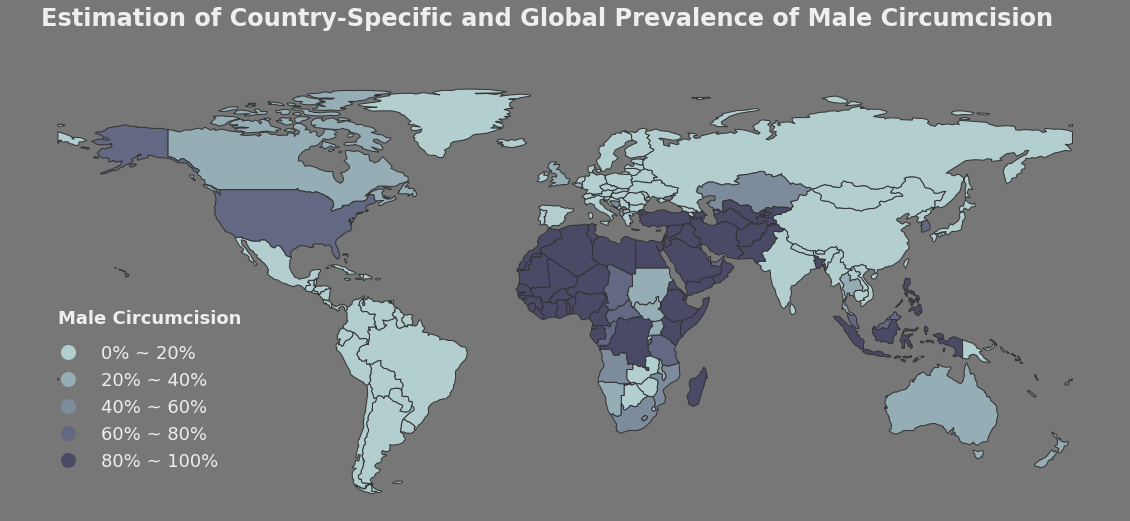

In [291]:
fig, ax = plt.subplots(figsize=(20,20))
fig.set_facecolor('#777777')
fig.suptitle('Estimation of Country-Specific and Global Prevalence of Male Circumcision',
             x=0.5,
             y=0.7, 
             fontsize=24,
             fontweight='bold',
             color='#eeeeee')

legend_labels = [f'{x}% ~ {x+20}%' for x in list(range(0,100,20))]

legend_kwds = {'loc': 'lower left',
               'borderaxespad': 2,
               'fontsize': 18,
               'labelcolor': '#eeeeee',
               'labels': legend_labels,
               'frameon': False,
               'markerscale': 1.5
              }

merged_gdf.plot(column='Male Circumcision %',
                cmap=mpl.cm.get_cmap('bone_r'),
                ax=ax,
                legend=True,
                vmin=-2,
                vmax=7,
                scheme='EqualInterval',
                k=5,
                edgecolor='#333333',
                linewidth=1,
                legend_kwds=legend_kwds)

ax.text(-180, 3, 'Male Circumcision', weight='bold', color='#eeeeee', size=18)

ax.patch.set_alpha(0)
ax.spines[:].set_visible(False)
ax.set(xticks=[], yticks=[])

plt.show()
# ax.tick_params(axis='y', length=0, labelcolor='#555555', pad=max(widths)+20)




#### Sunburst

([<matplotlib.patches.Wedge at 0x12a3c8880>,
 [Text(1.085677571476942, -0.17692996013092144, 'Asia'),
  Text(-1.0740460618632315, -0.23753959037618055, 'Africa'),
  Text(-0.49223961037324826, 0.9837175234688019, 'Americas'),
  Text(-0.1059939301712691, 1.0948814030600977, 'Europe'),
  Text(-0.01293314233452903, 1.0999239672947194, '')],
 [Text(0.789583688346867, -0.12867633464067013, '55.1%'),
  Text(-0.7811244086278046, -0.1727560657281313, '32.8%'),
  Text(-0.3579924439078169, 0.7154309261591286, '9.4%'),
  Text(-0.07708649467001388, 0.7962773840437074, '2.3%'),
  Text(-0.009405921697839294, 0.7999447034870686, '')])

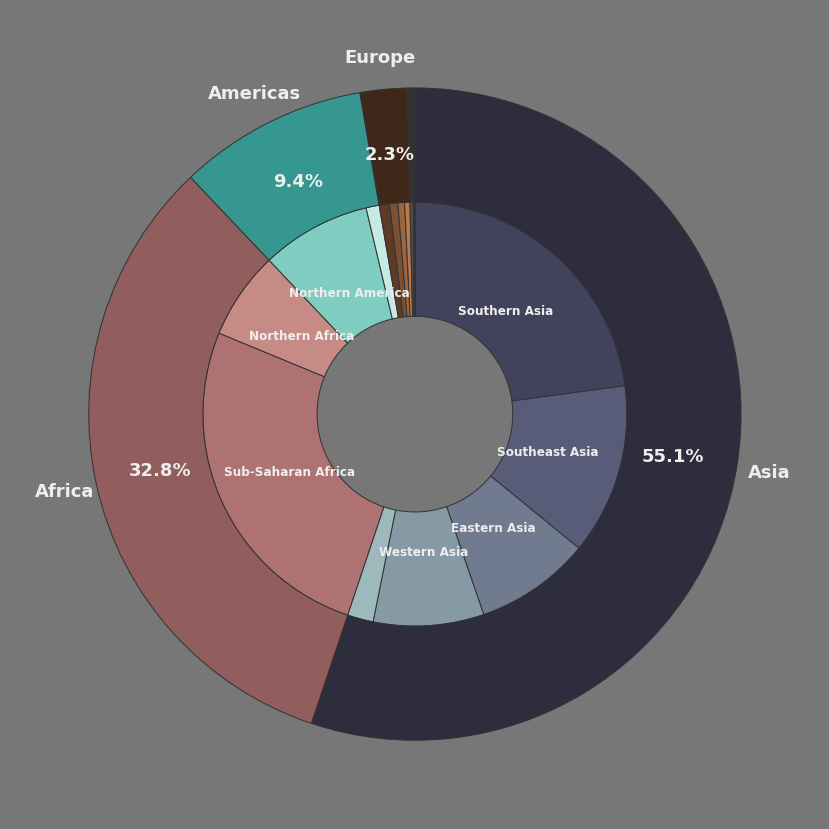

In [325]:
# First Ring (outside)
region_sum = merged_gdf.groupby('Region').sum().sort_values(['Total Males Circumcized'], ascending=False)
sub_region_sum = merged_gdf.groupby(['Region','Sub-Region']).sum().reset_index().merge(region_sum, on='Region', how='left').sort_values(['Total Males Circumcized_y', 'Total Males Circumcized_x'], ascending=False)

cmaps = {'Asia': mpl.cm.get_cmap('bone'), 
         'Africa': mpl.cm.get_cmap('pink'), 
         'Americas': mpl.cm.get_cmap('BrBG_r'),
         'Europe': mpl.cm.get_cmap('copper'), 
         'Oceania': mpl.cm.get_cmap('gray')}

region_colors = list(map(lambda x: x(0.2), cmaps.values()))
region_labels = list(region_sum.index[:-1]) + ['']
sub_region_colors = [cmaps[row['Region']](0.1*row['Total Males Circumcized_x']+0.2) for i, row in pd.concat([sub_region_sum[['Region']], sub_region_sum.groupby('Region')['Total Males Circumcized_x'].rank(ascending=False)], axis=1).iterrows()]
sub_region_labels = [row['Sub-Region'] if row['Total Males Circumcized_x'] / region_sum['Total Males Circumcized'].sum()> 0.02 else '' for i, row in sub_region_sum.iterrows()]

size = 0.35
fig, ax = plt.subplots(figsize=(15,15))
fig.set_facecolor('#777777')


ax.pie(sub_region_sum['Total Males Circumcized_x'],
       radius=1-size, 
       colors=sub_region_colors,
       labels=sub_region_labels,
       labeldistance=1-size,
       counterclock=False,
       startangle=90,
       textprops=dict(color='#eeeeee', 
                      weight='bold', 
                      ha='center',va='center', 
                      size=12),
       wedgeprops=dict(width=size, edgecolor='#333333'))

# Do not display small values (<= 1%)
def my_pct(pct):
    if pct <= 1:
        return ''
    else:
        return f'{pct:1.1f}%'

ax.pie(region_sum['Total Males Circumcized'], 
       radius=1, 
       colors=region_colors,
       labels=region_labels,
       labeldistance=1.1,
       autopct=my_pct,
       pctdistance=0.8,
       counterclock=False,
       startangle=90,
       textprops=dict(color='#eeeeee', 
                      weight='bold', 
                      ha='center',va='center', 
                      size=18),
       wedgeprops=dict(width=size, edgecolor='#333333'))




#### Layout

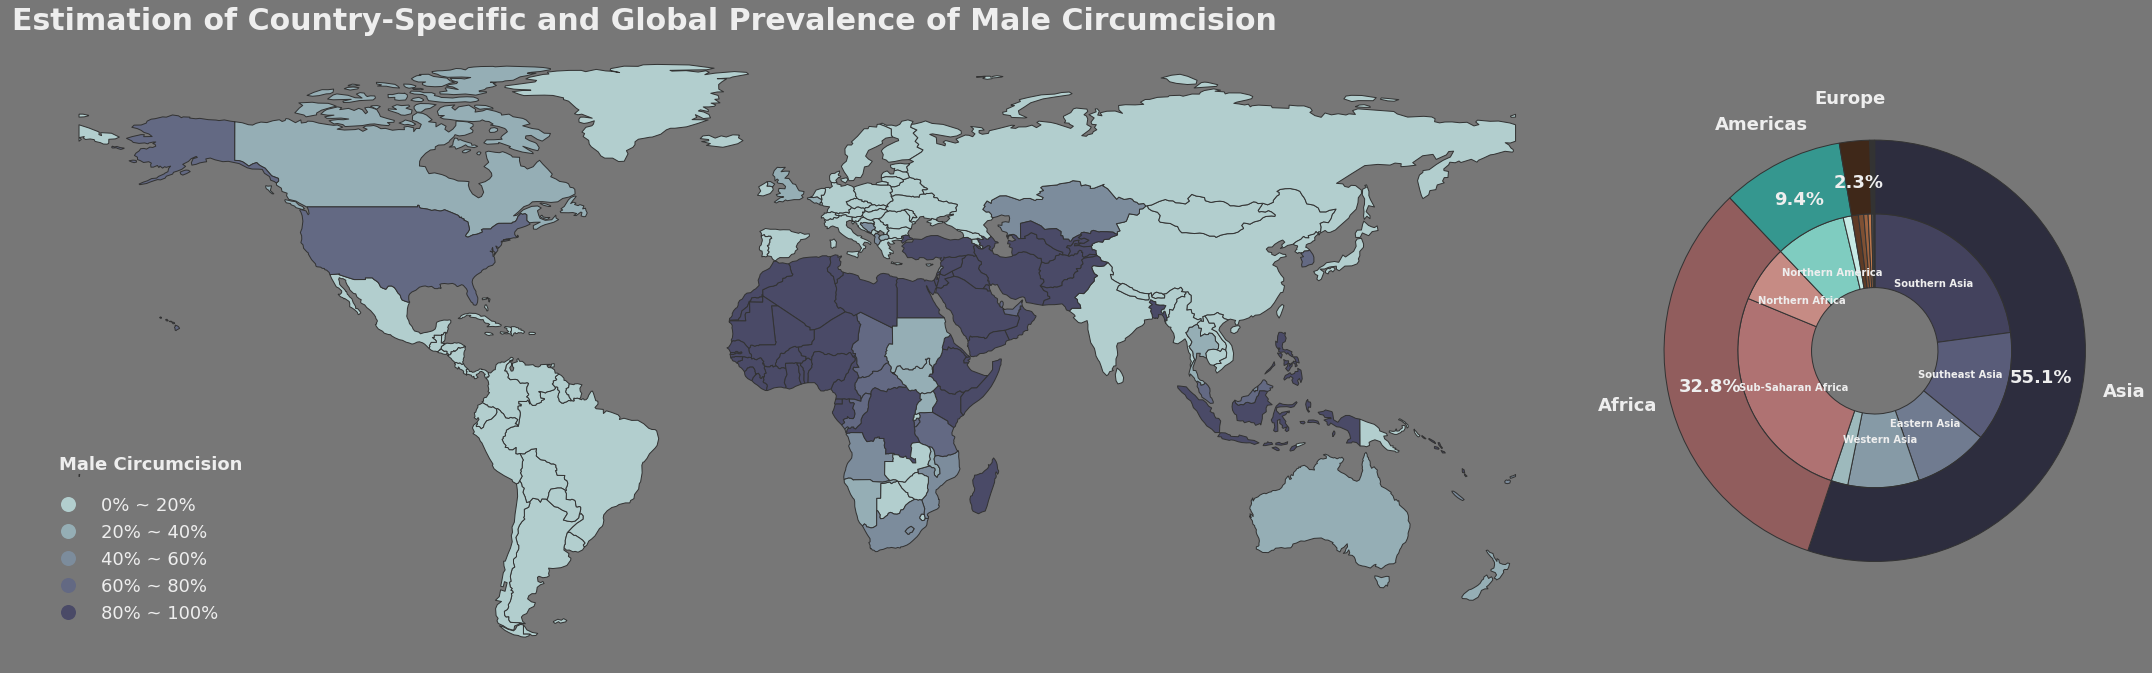

In [378]:
# Create Layout by using gridspec
fig = plt.figure(facecolor='#777777', figsize=(30, 15), tight_layout=True)
gs = fig.add_gridspec(1, 2, width_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0, 0], alpha=1)
ax2 = fig.add_subplot(gs[0, 1], alpha=1)

# Add title
fig.suptitle('Estimation of Country-Specific and Global Prevalence of Male Circumcision',
             x=0.3,
             y=0.8, 
             fontsize=30,
             fontweight='bold',
             color='#eeeeee')



# plot choropleth map
legend_labels = [f'{x}% ~ {x+20}%' for x in list(range(0,100,20))]

legend_kwds = {'loc': 'lower left',
               'borderaxespad': 2,
               'fontsize': 18,
               'labelcolor': '#eeeeee',
               'labels': legend_labels,
               'frameon': False,
               'markerscale': 1.5
              }

merged_gdf.plot(column='Male Circumcision %',
                cmap=mpl.cm.get_cmap('bone_r'),
                ax=ax1,
                legend=True,
                vmin=-2,
                vmax=7,
                scheme='EqualInterval',
                k=5,
                edgecolor='#333333',
                linewidth=1,
                legend_kwds=legend_kwds)

ax1.text(-185, -15, 'Male Circumcision', weight='bold', color='#eeeeee', size=18)
ax1.patch.set_alpha(0)
ax1.spines[:].set_visible(False)
ax1.set(xticks=[], yticks=[])


# plot pie chart （region ratio）
# First Ring (outside)
region_sum = merged_gdf.groupby('Region').sum().sort_values(['Total Males Circumcized'], ascending=False)
sub_region_sum = merged_gdf.groupby(['Region','Sub-Region']).sum().reset_index().merge(region_sum, on='Region', how='left').sort_values(['Total Males Circumcized_y', 'Total Males Circumcized_x'], ascending=False)

cmaps = {'Asia': mpl.cm.get_cmap('bone'), 
         'Africa': mpl.cm.get_cmap('pink'), 
         'Americas': mpl.cm.get_cmap('BrBG_r'),
         'Europe': mpl.cm.get_cmap('copper'), 
         'Oceania': mpl.cm.get_cmap('gray')}

region_colors = list(map(lambda x: x(0.2), cmaps.values()))
region_labels = list(region_sum.index[:-1]) + ['']
sub_region_colors = [cmaps[row['Region']](0.1*row['Total Males Circumcized_x']+0.2) for i, row in pd.concat([sub_region_sum[['Region']], sub_region_sum.groupby('Region')['Total Males Circumcized_x'].rank(ascending=False)], axis=1).iterrows()]
sub_region_labels = [row['Sub-Region'] if row['Total Males Circumcized_x'] / region_sum['Total Males Circumcized'].sum()> 0.02 else '' for i, row in sub_region_sum.iterrows()]

size = 0.35


ax2.pie(sub_region_sum['Total Males Circumcized_x'],
       radius=1-size, 
       colors=sub_region_colors,
       labels=sub_region_labels,
       labeldistance=1-size,
       counterclock=False,
       startangle=90,
       textprops=dict(color='#eeeeee', 
                      weight='bold', 
                      ha='center',va='center', 
                      size=10),
       wedgeprops=dict(width=size, edgecolor='#333333'))

# Do not display small values (<= 1%)
def my_pct(pct):
    if pct <= 1:
        return ''
    else:
        return f'{pct:1.1f}%'

ax2.pie(region_sum['Total Males Circumcized'], 
       radius=1, 
       colors=region_colors,
       labels=region_labels,
       labeldistance=1.2,
       autopct=my_pct,
       pctdistance=0.8,
       counterclock=False,
       startangle=90,
       textprops=dict(color='#eeeeee', 
                      weight='bold', 
                      ha='center',va='center', 
                      size=18),
       wedgeprops=dict(width=size, edgecolor='#333333'))


save_dir = Path('../fig')
save_name = list(Path.cwd().glob('*.ipynb'))[0].stem
fig.savefig(save_dir / f'{save_name}.png', transparent=False, bbox_inches='tight')

### Viz by Plotly

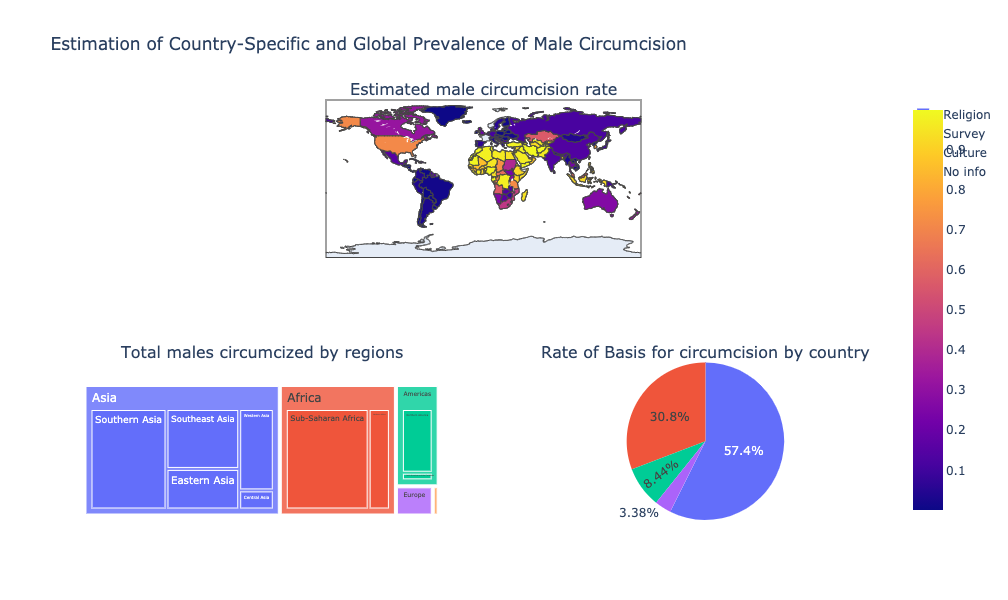

In [134]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'colspan':2, 'type':'choropleth'}, None],
           [{'type':'treemap'}, {'type':'pie'}]],
    subplot_titles=('Estimated male circumcision rate',
                    'Total males circumcized by regions',
                    'Rate of Basis for circumcision by country'))

choropleth = px.choropleth(merged_gdf[merged_gdf['iso_a3'].notna()], 
                           geojson=merged_gdf['geometry'], 
                           locations=merged_gdf[merged_gdf['iso_a3'].notna()].index,
                           color='Male Circumcision %',
                           color_continuous_scale='Mint',
                           hover_name='Country/Territory',
                           labels={'Male Circumcision %':'circumcision rate'},
                           width=1000, height=600).update_geos(fitbounds='locations', visible=False)

treemap = px.treemap(merged_gdf, 
                     path=['Region', 'Sub-Region'], 
                     values='Total Males Circumcized',
                    )


pie = px.pie(data_frame=merged_gdf.groupby('Basis').count().sort_values('Country/Territory', ascending=False),
             values='Country/Territory',
             names=merged_gdf.groupby('Basis').count().sort_values('Country/Territory', ascending=False).index)


fig.add_trace(choropleth['data'][0], row=1, col=1)
fig.add_trace(treemap['data'][0], row=2, col=1)
fig.add_trace(pie['data'][0], row=2, col=2)



fig.update_layout(height=600, width=1000, title_text='Estimation of Country-Specific and Global Prevalence of Male Circumcision')
fig.show()